# Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta = "/content/drive/MyDrive/Colab Notebooks/TFG TLOU Reviews/"
user_reviews_g2 = pd.read_csv(ruta+"user_reviews_g2.csv")

## Descargar los trozos en ficheros csv para computarlos de forma separada

In [4]:
from google.colab import files

english_df = user_reviews_g2[user_reviews_g2['language']=='English']

parts = np.array_split(english_df, 10)

for i, part in enumerate(parts):
    filename = f'english_df_part_{i}.csv'
    part.to_csv(filename, index=False)
    #files.download(filename)

In [5]:
from google.colab import files

spanish_df = user_reviews_g2[user_reviews_g2['language']=='Spanish']

parts = np.array_split(spanish_df, 3)

for i, part in enumerate(parts):
    filename = f'spanish_df_part_{i}.csv'
    part.to_csv(filename, index=False)
    #files.download(filename)

In [6]:
from google.colab import files

russian_df = user_reviews_g2[user_reviews_g2['language']=='Russian']

parts = np.array_split(russian_df, 6)

for i, part in enumerate(parts):
    filename = f'russian_df_part_{i}.csv'
    part.to_csv(filename, index=False)
    #files.download(filename)

In [7]:
multilingual_df = user_reviews_g2[(user_reviews_g2['language']!='Russian') & (user_reviews_g2['language']!='Spanish') & (user_reviews_g2['language']!='English') & (user_reviews_g2['language']!='Portuguese')]
multilingual_df.shape

(986, 8)

In [8]:
multilingual_df.head()


,id,review,type_review,date,language,views,votes,score
0,Maksim_ON,"Продовження культової серії, було зіпсоване че...",expanded,2021-03-17,Ukrainian,2,2,2
10,BrAtur,Bad Really bad... Whwuipqlsjsjjsjsjsjsjsjsjjsj...,normal,2021-03-12,Croatian,2,2,1
41,Dinstiak,Best game ever..no doubt.........................,expanded,2021-03-07,Norwegian,4,2,10
45,Dinstiak,Best game ever..no doubt.........................,expanded,2021-03-07,Norwegian,5,2,10
64,LesandroBonucci,"-unforgettable-,-unforgettable-,-unforgettable...",normal,2021-03-01,Norwegian,2,1,7


In [9]:
languages = multilingual_df["language"].unique()
print(len(languages))
print(languages)

38
['Ukrainian' 'Croatian' 'Norwegian' 'Somali' 'Not identified' 'Turkish'
 'Italian' 'French' 'Estonian' 'Afrikaans' 'Dutch' 'Slovenian' 'Tagalog'
 'Korean' 'Bulgarian' 'Polish' 'Lithuanian' 'Albanian' 'Danish' 'German'
 'Macedonian' 'Japanese' 'Persian' 'Czech' 'Catalan' 'Finnish' 'Hungarian'
 'Arabic' 'Swahili' 'Slovak' 'Welsh' 'Romanian' 'Indonesian' 'Vietnamese'
 'Swedish' 'Thai' 'Latvian' 'Hindi']


In [10]:
xml_model_languages = [
    "Afrikaans", "Amharic", "Arabic", "Assamese", "Azerbaijani", "Belarusian",
    "Bulgarian", "Bengali", "Breton", "Bosnian", "Catalan", "Czech", "Welsh",
    "Danish", "German", "Greek", "English", "Esperanto", "Spanish", "Estonian",
    "Basque", "Persian", "Finnish", "French", "Western Frisian", "Irish",
    "Scottish Gaelic", "Galician", "Gujarati", "Hausa", "Hebrew", "Hindi",
    "Croatian", "Hungarian", "Armenian", "Indonesian", "Icelandic", "Italian",
    "Japanese", "Javanese", "Georgian", "Kazakh", "Khmer", "Kannada", "Korean",
    "Kurdish", "Kyrgyz", "Latin", "Lao", "Lithuanian", "Latvian", "Malagasy",
    "Macedonian", "Malayalam", "Mongolian", "Marathi", "Malay", "Burmese",
    "Nepali", "Dutch", "Norwegian", "Oromo", "Oriya", "Panjabi", "Polish",
    "Pashto", "Portuguese", "Romanian", "Russian", "Sanskrit", "Sindhi",
    "Sinhala", "Slovak", "Slovenian", "Somali", "Albanian", "Serbian",
    "Sundanese", "Swedish", "Swahili", "Tamil", "Telugu", "Thai", "Tagalog",
    "Turkish", "Uyghur", "Ukrainian", "Urdu", "Uzbek", "Vietnamese", "Xhosa",
    "Yiddish", "Chinese"
]

In [11]:
accept_lang = []
for i in languages:
  if i not in xml_model_languages:
    accept_lang.append(i)

In [12]:
accept_lang

['Not identified']

In [13]:
multilingual_df = multilingual_df[multilingual_df['language'] != 'Not identified']

In [14]:
multilingual_df['language'].unique()

array(['Ukrainian', 'Croatian', 'Norwegian', 'Somali', 'Turkish',
       'Italian', 'French', 'Estonian', 'Afrikaans', 'Dutch', 'Slovenian',
       'Tagalog', 'Korean', 'Bulgarian', 'Polish', 'Lithuanian',
       'Albanian', 'Danish', 'German', 'Macedonian', 'Japanese',
       'Persian', 'Czech', 'Catalan', 'Finnish', 'Hungarian', 'Arabic',
       'Swahili', 'Slovak', 'Welsh', 'Romanian', 'Indonesian',
       'Vietnamese', 'Swedish', 'Thai', 'Latvian', 'Hindi'], dtype=object)

In [15]:
multilingual_df.shape

(926, 8)

In [16]:
# from google.colab import files
# filename = f'multilingual_df.csv'
# multilingual_df.to_csv(filename, index=False)
# files.download(filename)

#Sentiment analisis con modelos especializados

## Twitter-roBERTa-large (English)

In [17]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

MODEL = "siebert/sentiment-roberta-large-english"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

reviews = {"Me encantó el videojuego", "No me gustó nada la narrativa"}
for index, text in  enumerate(reviews):
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    output = model(**encoded_input)
    scores = softmax(output.logits.detach().numpy(), axis=1)[0]
    labels = config.id2label

    for label, score in zip(labels, scores):
      print(("positivo: " if label == 0 else "negativo: "), f"{score.item() * 100:.2f}%")

    print()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

positivo:  0.14%
negativo:  99.86%

positivo:  99.95%
negativo:  0.05%



## roBERTa_bne_sentiment_analysis_es (Spanish)

In [18]:
spanish_df = user_reviews_g2[user_reviews_g2['language']=='Spanish']
spanish_df.head()

,id,review,type_review,date,language,views,votes,score
36,Mamiruiz117,Arruinaron completamente una saga que practica...,normal,2021-03-08,Spanish,3,2,4
60,tigaw77233,"Lesbianas musculosas peleando.,Pura mierda, to...",expanded,2021-03-02,Spanish,2,1,0
70,SludgyCannon616,Es un chiste muy mal contado en comparación a ...,normal,2021-02-28,Spanish,2,2,0
109,Elchicodel_7,Técnicamente es de los mejores de esta generac...,normal,2021-01-25,Spanish,2,2,4
131,CRISTIXNSIO,Ohflydjtzktflufñufñihñisvñialycauco sñ js ohs ...,normal,2021-01-20,Spanish,3,2,2


In [19]:
spanish_df['review'].iloc[8]

'Un juego muy bueno en muchos ámbitos, una pena la narrativa, quizás su única pega ya que hay varias contradicciones a partir de la anterior entrega que fue bastante alucinante en cuanto a la Personalidad de los personajes y básicamente hacer que el usuario empatice con Abby y es muy dificil por lo que sucede en el juego mediante la historia  :3 sin embargo me gustó bastante podrás pasar horas de juego disfrutables en el Gameplay.'

In [20]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F


tokenizer = AutoTokenizer.from_pretrained("edumunozsala/roberta_bne_sentiment_analysis_es")
model = AutoModelForSequenceClassification.from_pretrained("edumunozsala/roberta_bne_sentiment_analysis_es")


text = "Es una verdadera maravilla, los gráficos increíbles, combates sublimes, historia bastante buena, enemigos formidables, lo recomiendo mucho y me gustaría que Naughty Dog siguiera haciendo juegos como este."

inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)


outputs = model(**inputs)


logits = outputs.logits


probs = F.softmax(logits, dim=1)


labels = {0: "negativo", 1: "positivo"}


for i, prob in enumerate(probs.squeeze()):
    print(f"El sentimiento '{labels[i]}' tiene una probabilidad de {prob.item() * 100:.2f}%")


predicted_class_id = probs.argmax(1).item()
predicted_label = labels[predicted_class_id]

print(f"\nEl sentimiento del texto es: {predicted_label}")



tokenizer_config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/849 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/851k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/509k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

El sentimiento 'negativo' tiene una probabilidad de 0.04%
El sentimiento 'positivo' tiene una probabilidad de 99.96%

El sentimiento del texto es: positivo


## ruBERT-tiny2-russian-sentiment (Russian)

In [21]:
russian_df.head(10)

,id,review,type_review,date,language,views,votes,score
6,winchesterpro,"Bruce Straley, come back to Naughty Dog, they ...",normal,2021-03-13,Russian,2,2,5
29,naikon2007,Отвратительно. Безумное навязывание толерантно...,normal,2021-03-09,Russian,2,2,0
72,Lexko,"Унылое, скучное скопище бредонаписанных вещей",expanded,2021-02-27,Russian,2,2,1
82,Kolya_PSx,Не рекомендую покупать эту игру за деньги! Это...,normal,2021-02-25,Russian,2,2,4
87,Prun,0 баллов - за распространение педерастии в игре.,expanded,2021-02-25,Russian,3,2,0
128,Snakpaii,Эта игра не заслуживает большего. Графика и ге...,normal,2021-01-20,Russian,2,2,4
139,Astormaze,"Игра на самом деле прекрасна, но вот сюжет... ...",normal,2021-01-19,Russian,3,2,3
157,doner0107,"Хуета с проплаченными обзорами,....,.............",expanded,2021-01-16,Russian,3,3,0
191,erkasteF,это просто одна ищ лучших игр когда либо созданых,expanded,2021-01-11,Russian,2,1,10
197,Prostomawka,Эта игра была сделана не для фанатов первой ча...,expanded,2021-01-11,Russian,4,3,0


In [22]:
russian_df.shape

(1482, 8)

In [23]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
from scipy.special import softmax

MODEL_NAME = "seara/rubert-tiny2-russian-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)

def analyze_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True)

    with torch.no_grad():
        outputs = model(**inputs)

    probabilities = softmax(outputs.logits[0].numpy())

    labels = ["neutral", "positive", "negative"]

    results = {label: probability for label, probability in zip(labels, probabilities)}

    return results

text = "Ты мне нравишься. Я тебя люблю"
results = analyze_sentiment(text)
print(results)

tokenizer_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

{'neutral': 0.00678023, 'positive': 0.9916707, 'negative': 0.0015490901}


In [24]:
russian_df.loc[197, 'review']

'Эта игра была сделана не для фанатов первой части, а для ценителей современных трендов, и как результат фанатам не понравилось, вот пускай хорошие оценки и ставят те для кого сделали это недоразумение'

# Labeling

La fase de labeling se realiza en distintos proyectos google colab con la misma configuración para paralelizar la capacidad de computo.

## Cargar todas las partes de los sentiment analisis y unirlas

In [25]:
# uploaded = files.upload()
# english_df = pd.DataFrame()

# for filename in uploaded.keys():
#     df = pd.read_csv(filename)
#     english_df = pd.concat([english_df, df])

# english_df.reset_index(drop=True, inplace=True)
# english_df.head()

In [26]:
# english_df['neutral'] = 0
# english_df.head(15)

In [27]:
# filename = f'english_df_complete_large.csv'
# english_df.to_csv(filename, index=False)
# files.download(filename)

In [28]:
# uploaded = files.upload()
# spanish_df = pd.DataFrame()

# for filename in uploaded.keys():
#     df = pd.read_csv(filename)
#     spanish_df = pd.concat([spanish_df, df])

# spanish_df.reset_index(drop=True, inplace=True)
# spanish_df.head()

In [29]:
# spanish_df['neutral'] = 0
# spanish_df.head(15)

In [30]:
# spanish_df['negative'] = round(spanish_df['negative'] / 100, 4)
# spanish_df['positive'] = round(spanish_df['positive'] / 100, 4)
# spanish_df.head()

In [31]:
# filename = f'spanish_df_complete.csv'
# spanish_df.to_csv(filename, index=False)
# files.download(filename)

In [32]:
# uploaded = files.upload()
# russian_df = pd.DataFrame()

# for filename in uploaded.keys():
#     df = pd.read_csv(filename)
#     russian_df = pd.concat([russian_df, df])

# russian_df.reset_index(drop=True, inplace=True)
# russian_df.head()

In [33]:
# filename = f'russian_df_complete.csv'
# russian_df.to_csv(filename, index=False)
# files.download(filename)

In [34]:
# portuguese_reviews = user_reviews_g2[user_reviews_g2['language']=='Portuguese']
# print(portuguese_reviews.shape)
# portuguese_reviews=portuguese_reviews.drop(labels='score', axis=1)

In [35]:
# sentiment_df.head()

In [36]:
# sentiment_df = sentiment_df.drop(labels=['predominant_label', 'review_length'], axis=1)

In [37]:
# sentiment_df.head()

In [38]:
# sentiment_df.shape

In [39]:
# merged_df_pt = pd.merge(portuguese_reviews, sentiment_df, on='review', how='left')
# merged_df_pt.head(151)

In [40]:
# merged_df.shape

In [41]:
# merged_df_pt.rename(columns={'positive_score': 'positive'}, inplace=True)
# merged_df_pt.rename(columns={'negative_score': 'negative'}, inplace=True)
# merged_df_pt.rename(columns={'neutral_score': 'neutral'}, inplace=True)

In [42]:
# merged_df.head()

In [43]:
# merged_df_pt.shape

In [44]:
# filename = f'portuguese_df_complete.csv'
# merged_df_pt.to_csv(filename, index=False)
# files.download(filename)

## Unir los datasets de cada idioma en uno

In [45]:
portuguese_df_complete = pd.read_csv(ruta+"portuguese_df_complete.csv")
english_df_complete = pd.read_csv(ruta+"english_df_complete_large.csv")
spanish_df_complete = pd.read_csv(ruta+"spanish_df_complete.csv")
russian_df_complete = pd.read_csv(ruta+"russian_df_complete.csv")

In [46]:
portuguese_df_complete.head()

,id,review,type_review,date,language,views,votes,score,positive,negative,neutral
0,Cliente,A maior traição que eu já vi na minha vida do ...,normal,2021-03-15,Portuguese,3,3,0.0,0.0,0.721669,0.000000
1,ENZOYT3351,"nah, o jogo é só historinha, eu gosto mais da ...",expanded,2021-03-11,Portuguese,3,3,0.0,0.0,0.000000,0.578534
2,Careca_de_capa,"Decepcionante, estragaram uma das melhores fra...",expanded,2021-01-24,Portuguese,2,2,0.0,0.0,0.957828,0.000000
3,David86,"Pessoas tem opiniões diferentes, se o jogo não...",expanded,2021-01-13,Portuguese,2,2,0.0,0.0,0.779884,0.000000
4,Eduarfin,"Jogo de de minininha , que gosta de outra mini...",expanded,2021-01-09,Portuguese,5,3,0.0,0.0,0.901129,0.000000


In [47]:
merged_df = pd.concat([spanish_df_complete, english_df_complete, portuguese_df_complete, russian_df_complete], ignore_index=True)

In [48]:
merged_df.sample(n=15)

,id,review,type_review,date,language,views,votes,score,negative,positive,neutral
1985,antrax2,"La historia malísima, con mensaje ridículo y h...",normal,2020-06-29,Spanish,5,4,3.0,0.999900,0.000100,0.00000
12737,Moses7,Completely threw away the hype of the story wi...,expanded,2020-06-29,English,7,4,0.0,0.999511,0.000489,0.00000
15550,BatSasha52,It`s f*cking masterpiece. I don't understand a...,expanded,2020-06-25,English,4,2,10.0,0.001106,0.998895,0.00000
797,AbbyOsMata,Es un juego muy bueno y el que no lo sepa apre...,expanded,2020-07-06,Spanish,3,2,10.0,0.000200,0.999800,0.00000
25722,ZAOakared2021,The story was so anticlimactic for an apocalyp...,expanded,2020-06-19,English,172,101,0.0,0.999422,0.000578,0.00000
19599,life_jackfruit,From the moment this game starts it doesn't fe...,normal,2020-06-22,English,1,1,0.0,0.999514,0.000486,0.00000
3659,AlexTheAwesome,I've finished this game a while ago (just forg...,expanded,2020-09-03,English,3,1,9.0,0.001138,0.998862,0.00000
29006,SPARTY,25 часов потребовалось чтобы абстрагироваться ...,normal,2020-07-03,Russian,5,2,10.0,0.809458,0.009932,0.18061
7593,Sgtbhaji,Absolutely loved the first. This one does not ...,expanded,2020-07-11,English,5,3,10.0,0.001091,0.998909,0.00000
23783,Apelsincho,"sorry for english, this is google translator.,...",normal,2020-06-20,English,3,1,0.0,0.999510,0.000490,0.00000


In [49]:
merged_df = merged_df.dropna()

In [50]:
merged_df.shape

(29618, 11)

In [51]:
# Encuentra el máximo valor en las columnas 'positive', 'negative' y 'neutral' para cada fila
max_values = merged_df[['positive', 'negative', 'neutral']].max(axis=1)

# Obtiene el nombre de la columna correspondiente al máximo valor para cada fila
predominant_label = merged_df[['positive', 'negative', 'neutral']].idxmax(axis=1)

# Añade la nueva columna 'predominant_label' al DataFrame con el nombre de la columna de mayor valor
merged_df['predominant_label'] = predominant_label
merged_df.head(15)

,id,review,type_review,date,language,views,votes,score,negative,positive,neutral,predominant_label
0,Mamiruiz117,Arruinaron completamente una saga que practica...,normal,2021-03-08,Spanish,3,2,4.0,0.9999,0.0001,0.0,negative
1,tigaw77233,"Lesbianas musculosas peleando.,Pura mierda, to...",expanded,2021-03-02,Spanish,2,1,0.0,0.9998,0.0002,0.0,negative
2,SludgyCannon616,Es un chiste muy mal contado en comparación a ...,normal,2021-02-28,Spanish,2,2,0.0,0.9997,0.0003,0.0,negative
3,Elchicodel_7,Técnicamente es de los mejores de esta generac...,normal,2021-01-25,Spanish,2,2,4.0,0.9998,0.0002,0.0,negative
4,CRISTIXNSIO,Ohflydjtzktflufñufñihñisvñialycauco sñ js ohs ...,normal,2021-01-20,Spanish,3,2,2.0,0.9997,0.0003,0.0,negative
5,halo3000,"solo tengo 1 palabra ""basura"",,conceptos claro...",normal,2021-01-20,Spanish,3,2,0.0,0.9997,0.0003,0.0,negative
6,Rika2380,"Lamentable!! Una pérdida de tiempo y dinero, t...",expanded,2021-01-15,Spanish,4,3,0.0,0.9999,0.0001,0.0,negative
7,Marcexplay,Que manera de arruinar una historia que estaba...,normal,2021-01-12,Spanish,3,2,1.0,0.9998,0.0002,0.0,negative
8,JorgeCrz,"Un juego muy bueno en muchos ámbitos, una pena...",normal,2021-01-11,Spanish,1,1,5.0,0.0001,0.9999,0.0,positive
9,FariCuba,La historia menos elaborada en videojuegos de ...,expanded,2021-01-10,Spanish,3,2,0.0,0.9998,0.0002,0.0,negative


#Revision de los resultados de los modelos especializados del sentiment analisis

In [52]:
merged_df.shape

(29618, 12)

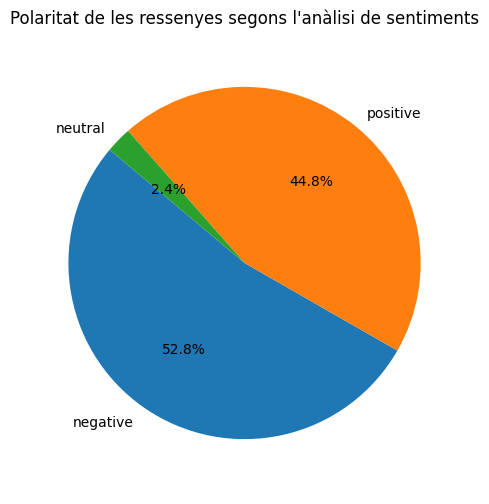

In [53]:
label_counts = merged_df['predominant_label'].value_counts()

plt.figure(figsize=(5, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Polaritat de les ressenyes segons l'anàlisi de sentiments")
plt.axis('equal')
plt.show()

In [54]:
positive_sentiments = merged_df[merged_df['predominant_label']=='positive']
negative_sentiments = merged_df[merged_df['predominant_label']=='negative']
neutral_sentiments = merged_df[merged_df['predominant_label']=='neutral']

<ipython-input-55-c3e5187df9bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=positive_sentiments, x='score', palette='viridis')


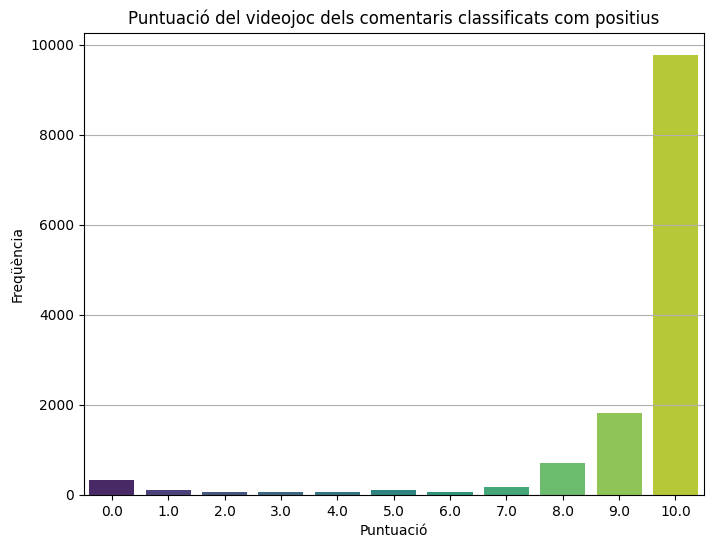

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(data=positive_sentiments, x='score', palette='viridis')
plt.title('Puntuació del videojoc dels comentaris classificats com positius')
plt.xlabel('Puntuació')
plt.ylabel('Freqüència')
plt.grid(axis='y')
plt.show()

<ipython-input-56-29fa6ab06c52>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=negative_sentiments, x='score', palette='viridis')


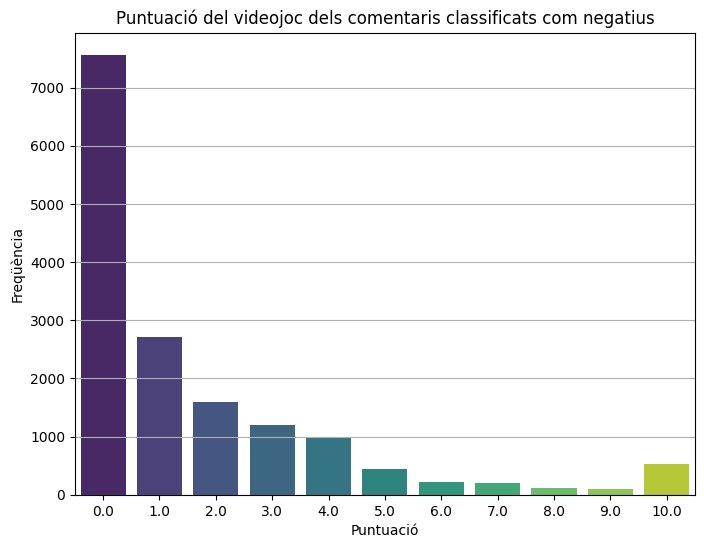

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(data=negative_sentiments, x='score', palette='viridis')
plt.title('Puntuació del videojoc dels comentaris classificats com negatius')
plt.xlabel('Puntuació')
plt.ylabel('Freqüència')
plt.grid(axis='y')
plt.show()

<ipython-input-57-071a6bc6b4c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=neutral_sentiments, x='score', palette='viridis')


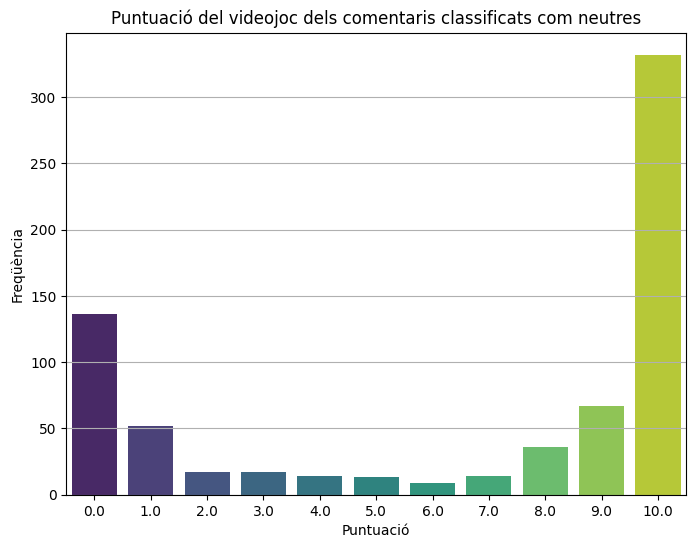

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(data=neutral_sentiments, x='score', palette='viridis')
plt.title('Puntuació del videojoc dels comentaris classificats com neutres')
plt.xlabel('Puntuació')
plt.ylabel('Freqüència')
plt.grid(axis='y')
plt.show()

In [60]:
filename = f'merged_df.csv'
merged_df.to_csv(filename, index=False)
#files.download(filename)

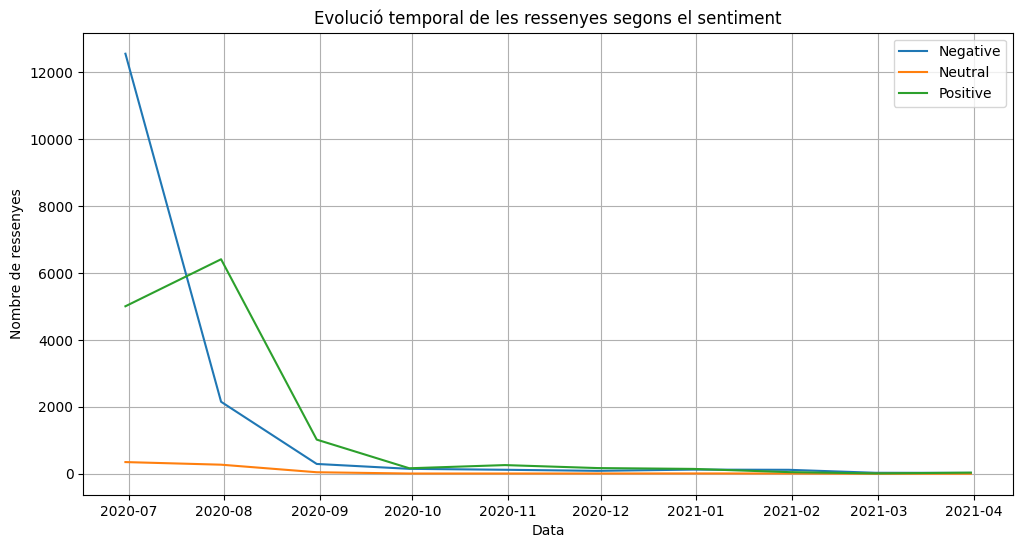

In [59]:
merged_df['date'] = pd.to_datetime(merged_df['date'])
grouped_df = merged_df.groupby([pd.Grouper(key='date', freq='M'), 'predominant_label'])['review'].count().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
plt.plot(grouped_df.index, grouped_df['negative'], label='Negative')
plt.plot(grouped_df.index, grouped_df['neutral'], label='Neutral')
plt.plot(grouped_df.index, grouped_df['positive'], label='Positive')

plt.xlabel('Data')
plt.ylabel('Nombre de ressenyes')
plt.title('Evolució temporal de les ressenyes segons el sentiment')
plt.legend()
plt.grid(True)
plt.show()